<a href="https://colab.research.google.com/github/Johnny-W-05/Aprendizaje-Automatico/blob/main/Taller_de_implementaci%C3%B3n_Introducci%C3%B3n_Juan_Andrade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/02-Prep-Datos-Metricas-Modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Preparación de Datos y Métricas de Evaluación
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Nombre y Apellido &bull; Fecha
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller veremos como aplicar diferentes técnicas para la carga y preparación de datos y las métricas de modelos.
   
Para eso necesitaremos las siguientes librerías:

In [ ]:
# Paquetes necesarios
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler, MinMaxScaler, KBinsDiscretizer, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, precision_score, recall_score, f1_score
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

---
## <font color='264CC7'> Lectura de Datos </font>


Primero, necesitas cargar el conjunto de datos "Boston house prices", que contiene información sobre el valor de las casas en diferentes áreas de Boston basado en múltiples factores. Este conjunto de datos está disponible para su descarga [aquí](https://raw.githubusercontent.com/rupakc/UCI-Data-Analysis/refs/heads/master/Boston%20Housing%20Dataset/Boston%20Housing/housing.data); la descripción de las variables  de puede encontrar [aquí](https://github.com/rupakc/UCI-Data-Analysis/blob/master/Boston%20Housing%20Dataset/Boston%20Housing/housing.names).

En los ejercicios de esta actividad, usaremos como variable objetivo para regresión "MEDV", que representa la mediana del valor de las casas en una zona de Boston (en miles de dólares, k$); y para clasificación, la variable "CHAS", que indica si la casa está cerca del río Charles (1) o no (0).

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos "boston house-prices dataset" y muestra:
<ul>
  <li>El número y nombre de los atributos.</li>
  <li>El número de filas del conjunto de datos.</li>
  <li>Verifica si hay "missing values" y en qué columnas.</li>
</ul>
</div>

In [ ]:
#Cargamos los datos
url = 'https://raw.githubusercontent.com/rupakc/UCI-Data-Analysis/refs/heads/master/Boston%20Housing%20Dataset/Boston%20Housing/housing.data'
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'] #Columnas en el orden de como se clasifican en la descripción de las variables
data = pd.read_csv(url, delim_whitespace=True, header=None, names= column_names)
display(data.head()) #Mostramos el número y nombre de los atributos
print("Este es el número de filas de la data: ", len(data)) #Número de filas del conjunto de datos
print(data.isnull().sum()) #Conteo de nulos totales y ver en qué columnas

/tmp/ipython-input-3819112767.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(url, delim_whitespace=True, header=None, names= column_names)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Este es el número de filas de la data:  506
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


---
## <font color='264CC7'> Análisis de los datos </font>

### <font color='264CC7'> Análisis estadístico básico </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Realiza un análisis estadístico básico:
<br>

<ul>
  <li>Variables categóricas:</li>
     <ul>
      <li>Calcula la frecuencia.</li>
      <li>Realiza un gráfico de barras.</li>
    </ul>
  <li>Variables numéricas:</li>
    <ul>
      <li>Calcula estadísticos descriptivos básicos como media, mediana, desviación estándar, entre otros.</li>
      <li>Realiza un histograma para las variables INDUS, AGE y MEDV.</li>
    </ul>
</ul>
    
<hr>
Sugerencia: Puedes usar la librería 'pandas' y sus funciones 'describe' y 'value_counts', así como las funciones 'bar' e 'hist' de matplotlib.
</div>


CHAS
0    471
1     35
Name: count, dtype: int64
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.

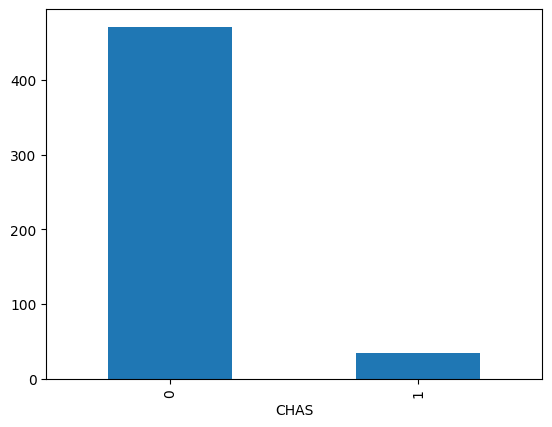

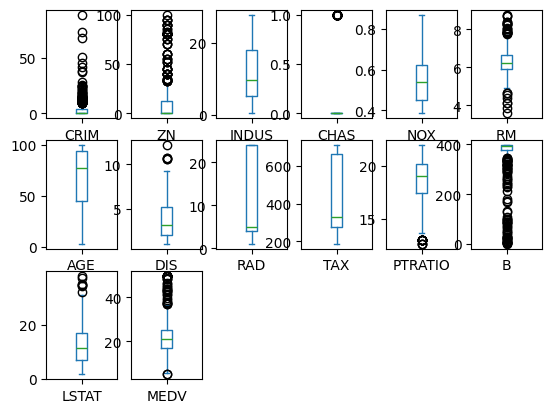

<Axes: >

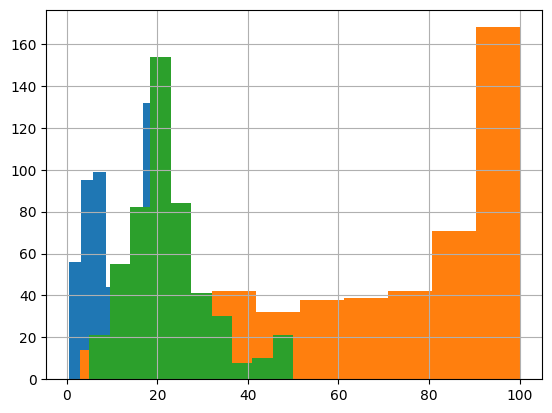

In [ ]:
#VARIABLES CATEGÓRICAS
#Para el set de datos que se proporcionó y viendo la descripción de las variables, se denota que existe solo una variable categórica que es "CHAS". Por tanto, calcularemos la frecuencia de los datos y un gráfico de barras para representarlo.
print(data['CHAS'].value_counts())
data['CHAS'].value_counts().plot(kind='bar')
#VARIABLES NUMÉRICAS
#El resto de variables son numéricas de carácter entre discreto y continuo. Por tanto haremos  descriptivos básicos para cada uno y el histograma solicitado:
print(data.describe())
#Como complemento haremos diagramas de cajas de cada uno
data.plot(kind='box', subplots=True, layout=(3,6), sharex=False, sharey=False)
plt.show()
data['INDUS'].hist() #El azul del gráfico
data['AGE'].hist() #El naranja del gráfico
data['MEDV'].hist()#El verde del gráfico

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>
Comenta los resultados.
</div>

1.   **Variables Categóricas**

Para la variable CHAS, podemos observar que tiene 471 observaciones para su valor 0 y solo 35 para su valor 1. En la descripción de las varaibles se sabe que significa cada valor, por lo que se concluye que:
- 35 viviendas limitan con el río Charles.
- 471 viviendas no limitan con el río Charles.

Estos resultados (dependiendo el objetivo final del análisis) pueden derivar en problemas si es que por ejemplo un modelo se entrena con ellos, ya que tener muchos datos sobre las viviendas que no limitan en el río harpía que este efectivamente detectara mejor estos datos pero perdería al detectar erroneamente los que si limitaban con el río.

2.   **Variables Numéricas**

De acuerdo a los gráficos obtenidos, vemos que las variables como CRIM, ZN, RM, B, LSTAT y MEDV tienen datos tipo outlier, explicando por ejemplo valores altos de desviación estándar y probablemente denotando la necesidad de tratar dichas variables. En cuanto a las variables de histograma (variables cuyos colores se denotan por el valor máximo que alcanzan en cada variable) se notan estos factores:
- Para INDUS valores concentrados entre lo que parece ser 0 y 10 y posteriormente en valores cercanos a 20.
- Para AGE el pico de concentración va a valores mayores a los 80 años de antigüedad.
- Para MEDV hay una gran concentración en el valor 20 (refiriendose que la mayoría de propiedades pueden estar valiendo cerca de 20 mil).




### <font color='264CC7'> Análisis exploratorio de los datos </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Realiza un gráfico del histograma de valores de la variable MEDV, separado por los posibles valores de CHAS. Para comparar mejor los valores de MEDV según las diferentes clases de CHAS, los histogramas deben estar sobrepuestos. Agrega una leyenda para identificar a qué clase corresponde cada histograma.
    
El objetivo es observar cómo se distribuye el valor de la respuesta MEDV en función de la clase CHAS, para identificar visualmente si este atributo categórico está relacionado con diferentes valores de la respuesta.
    
<hr>
Sugerencia: Usa la función "hist" de la librería "matplotlib", utilizando el parámetro "alpha" para que se aprecien los histogramas sobrepuestos.<br>
Sugerencia: Para una mejor comparación, considera representar la densidad de probabilidad en lugar del número de entradas por bin. Esto permite usar la misma escala para cada clase y facilita la comparación. Puedes usar el parámetro "density" de la misma función "hist".  
</div>

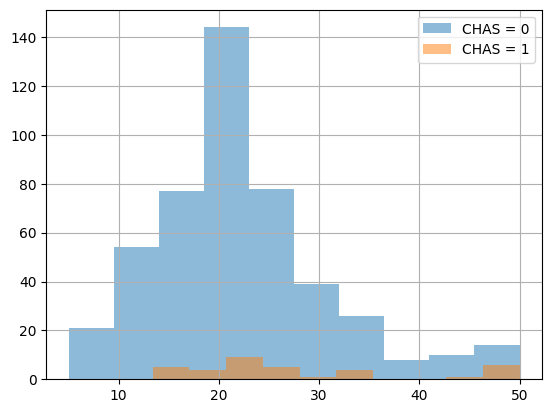

In [ ]:
#Primero generamos los histogramas sobrepuestos con las entradas donde se separa los datos de MEDV por la variable CHAS
data[data['CHAS'] == 0]['MEDV'].hist(alpha=0.5)
data[data['CHAS'] == 1]['MEDV'].hist(alpha=0.5)
plt.legend(['CHAS = 0', 'CHAS = 1']) #Creamos la leyenda para identificarlos

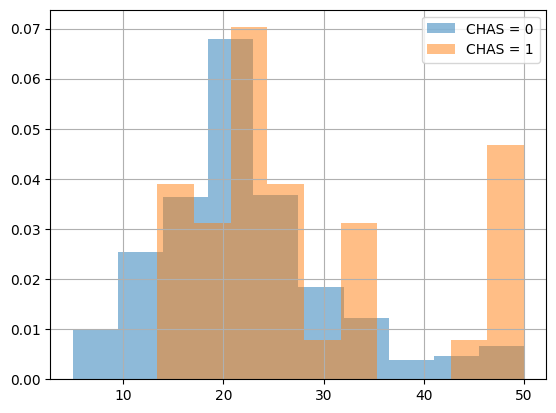

In [ ]:
#Ahora usamos la densidad de probabilidad
data[data['CHAS'] == 0]['MEDV'].hist(alpha=0.5, density=True)
data[data['CHAS'] == 1]['MEDV'].hist(alpha=0.5, density=True)
plt.legend(['CHAS = 0', 'CHAS = 1'])

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong>
<br> Mirando los histogramas, ¿te parece que el atributo CHAS tendrá algún peso a la hora de predecir la mediana del precio de las casas, MEDV? ¿Porqué?
</div>

Viendo el gráfico de las entradas, vemos que por la frecuencia de los datos no es notoria una diferencia significativa que pueda decir si es buena opción separar por la variable CHAS. No obstante la densidad de probabilidad si nos da mejor vista de cómo estos datos se separan y diría que si nos puede servir sobre todo para distinguir viviendas de valores medianos y altos en relación a si tener un límite con el río Charles es un factor decisivo de ese valor de MEDV.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Calcula y muestra la correlación entre todos los atributos numéricos y la variable respuesta MEDV.
</div>


In [ ]:
#para la correlacion usamos un corrwith excluyendo la variable categórica CHAS
corr = data.drop('CHAS', axis=1).corrwith(data['MEDV'])
print(corr) #imprimimos

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MEDV       1.000000
dtype: float64


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Representa gráficamente las relaciones entre todas las parejas de variables numéricas (sin incluir la variable respuesta) del conjunto de datos. El objetivo de este ejercicio es observar y analizar gráficamente las correlaciones entre las variables.
<hr>Sugerencia: Puedes usar la función "pairplot" de la librería 'seaborn'.
</div>


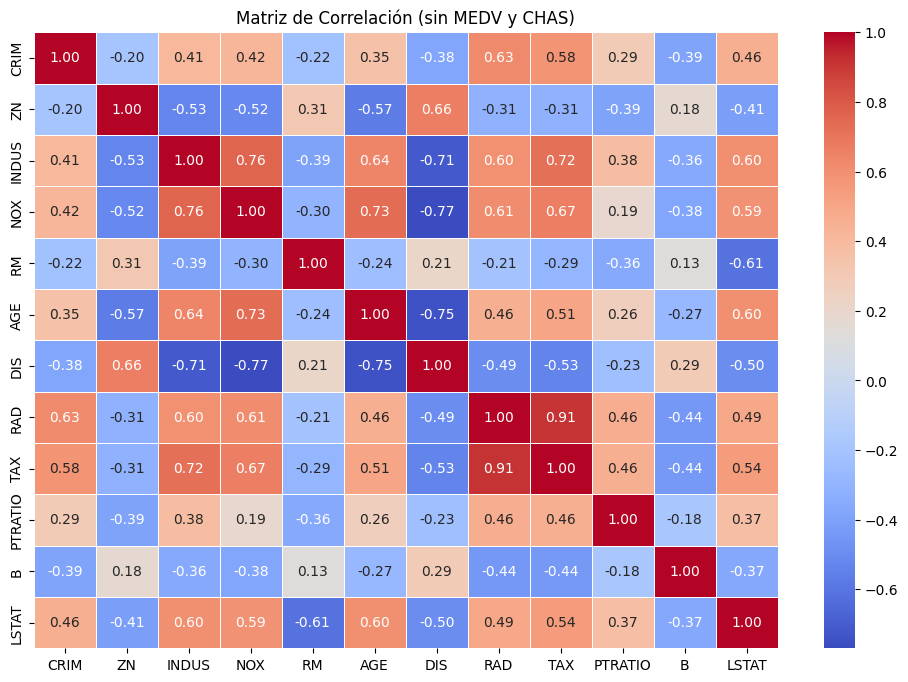

In [ ]:
#Primero hacemos un heatmap para entender las correalaciones de las variables sin contar MEDV y CHAS
plt.figure(figsize=(12, 8))
sns.heatmap(
    data.drop(columns=["MEDV", "CHAS"]).corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Matriz de Correlación (sin MEDV y CHAS)")
plt.show()


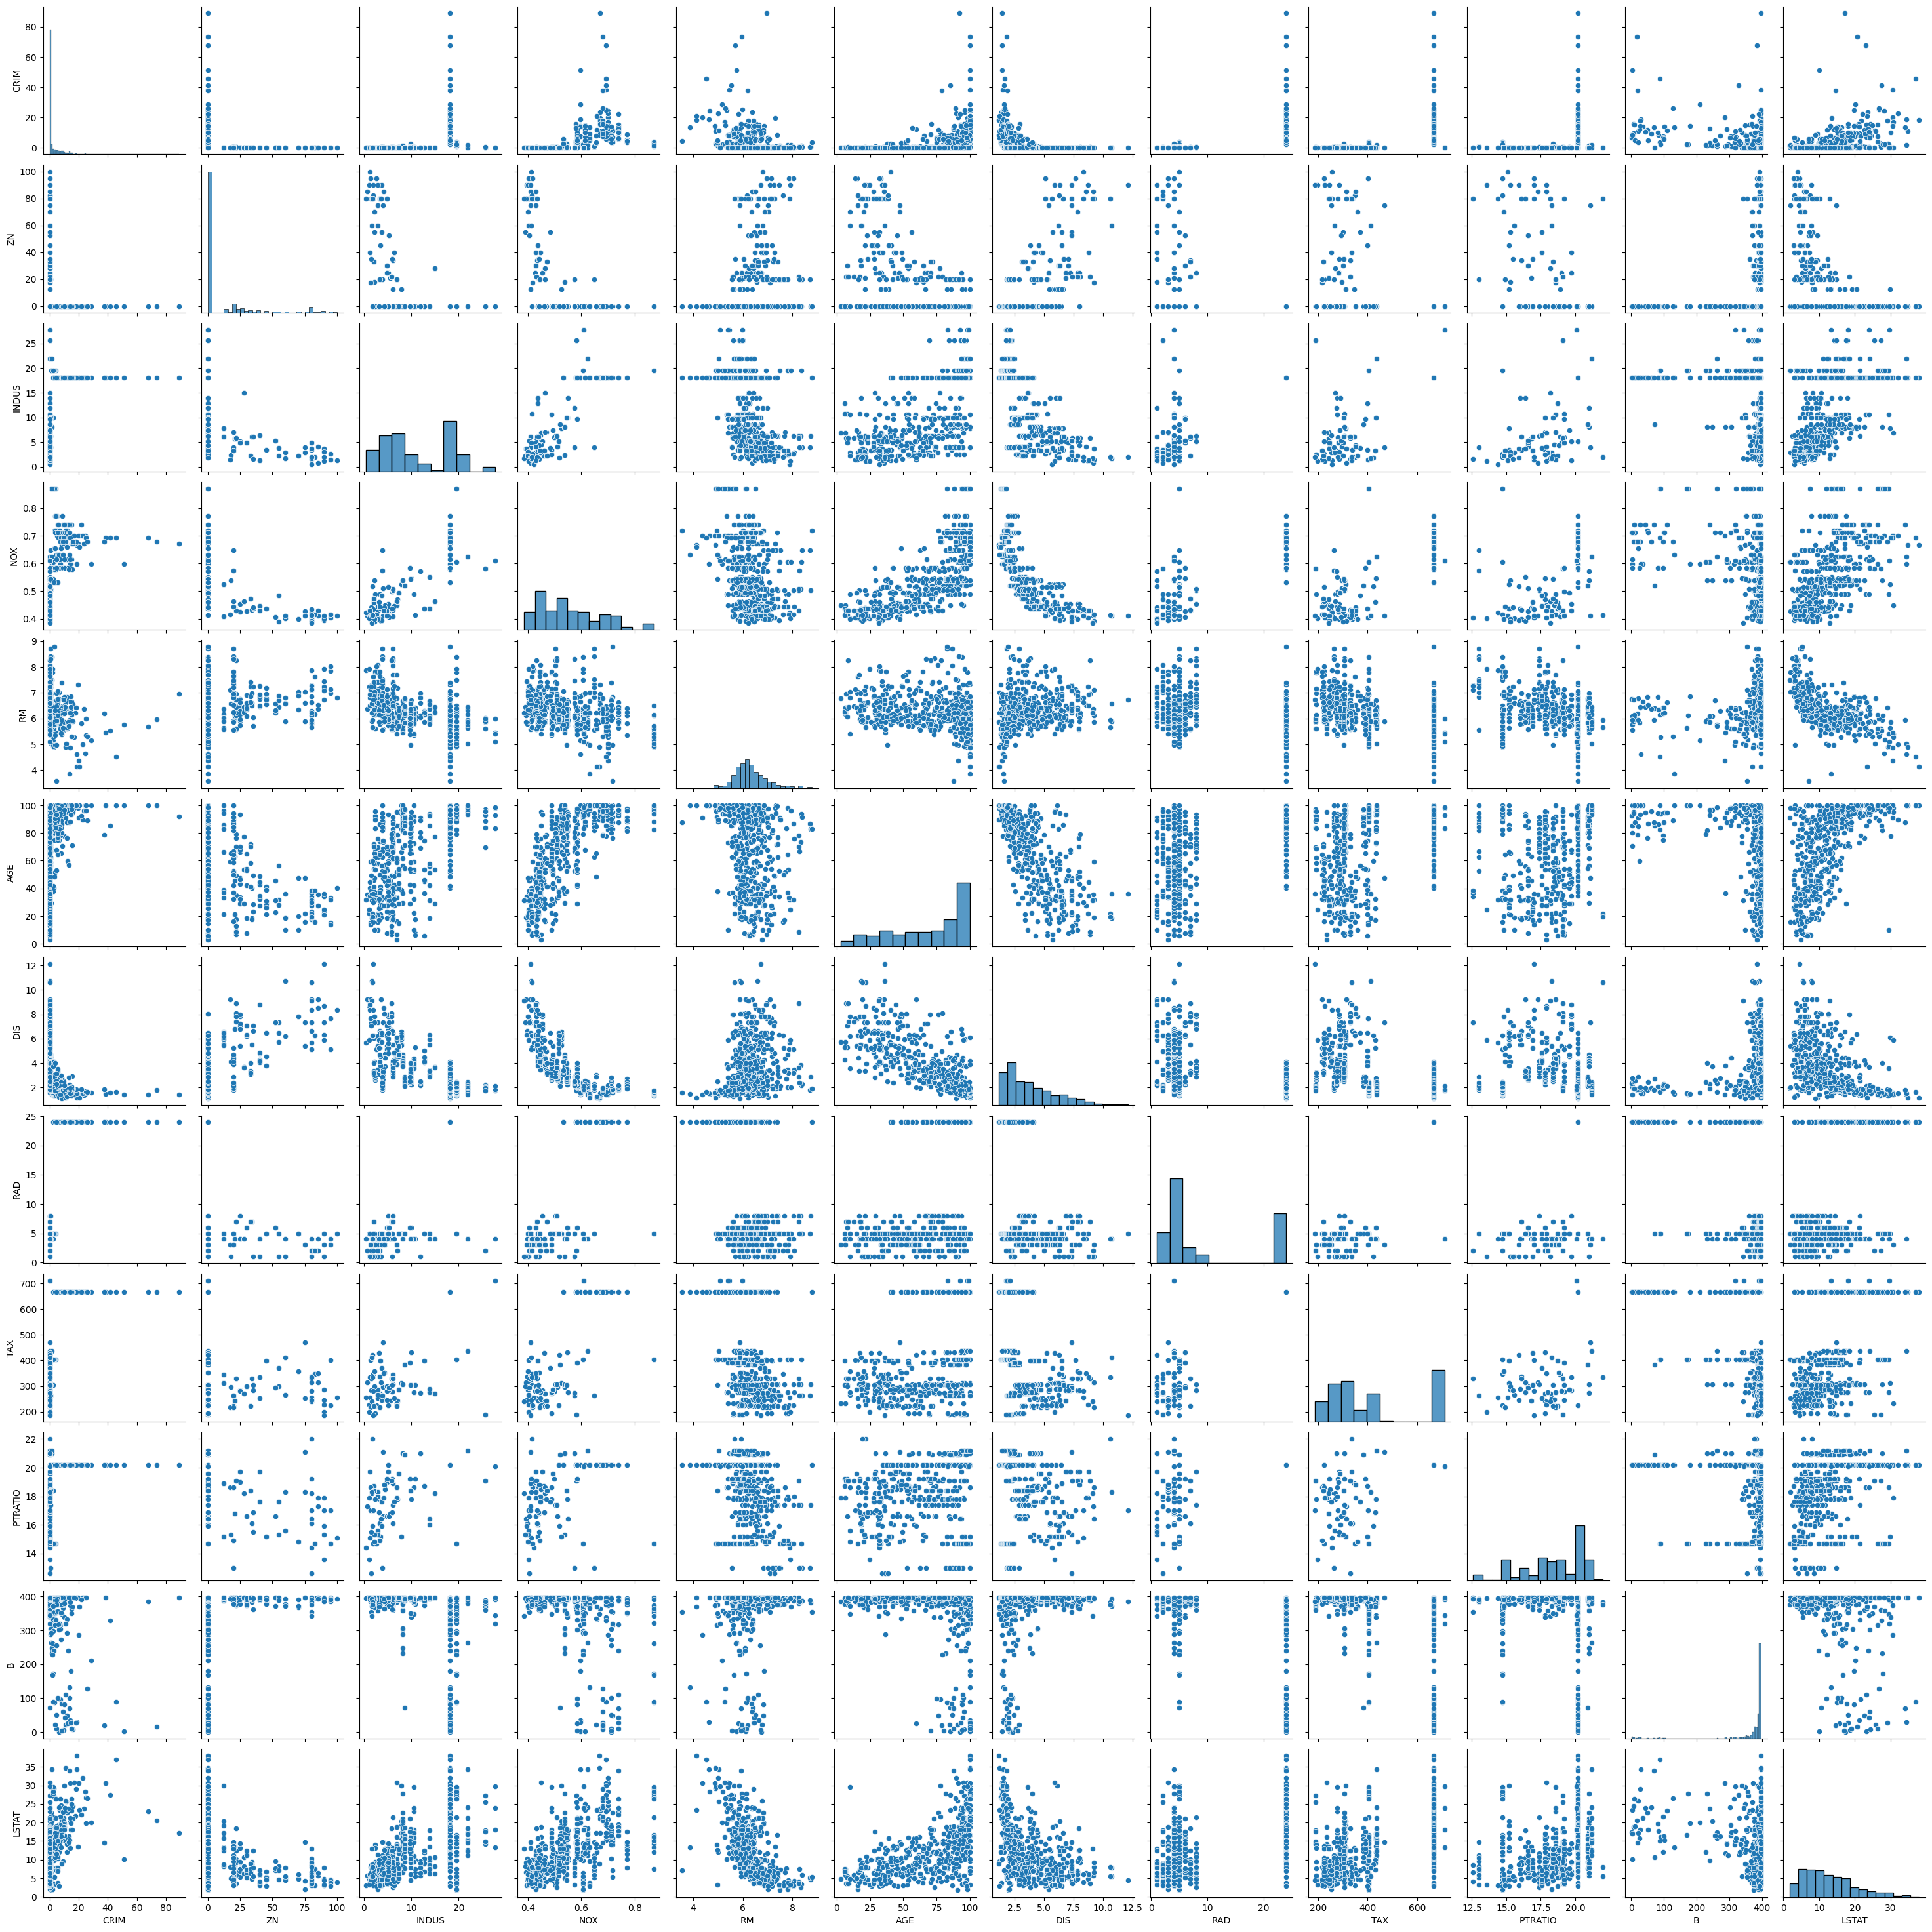

In [ ]:
#ahora con pairplot
sns.pairplot(data.drop(columns=["MEDV", "CHAS"]))
plt.show()


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Identifica los 2 atributos con la correlación más fuerte con la variable respuesta y los 2 con la correlación más débil (considerando el valor absoluto del coeficiente de correlación).
    
Para analizar las correlaciones gráficamente, representa, para cada uno de los 4 atributos identificados, un scatter plot con el atributo en el eje x y la respuesta en el eje y. Además, añade en cada gráfico una regresión lineal que ajuste los puntos.
        
<hr>Sugerencia: Puedes usar la función "regplot" de la librería 'seaborn'.
</div>


MEDV       1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
dtype: float64


<Axes: xlabel='DIS', ylabel='MEDV'>

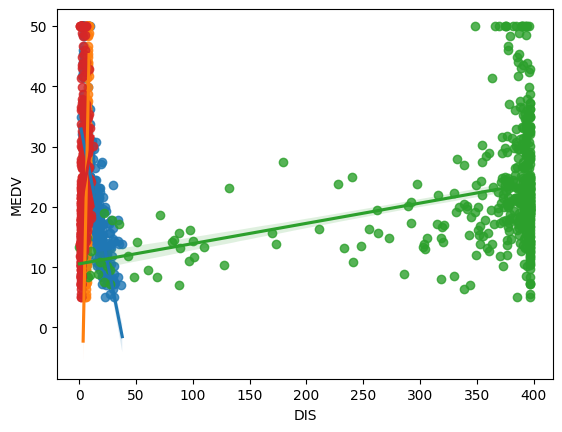

In [ ]:
#Revisamos las correlaciones más altas y bajas (en valor absoluto)
print(corr.abs().sort_values(ascending=False))
#Concluimos que los más altos son LSTAT y RM y los más débiles son B y DIS

<Axes: xlabel='LSTAT', ylabel='MEDV'>

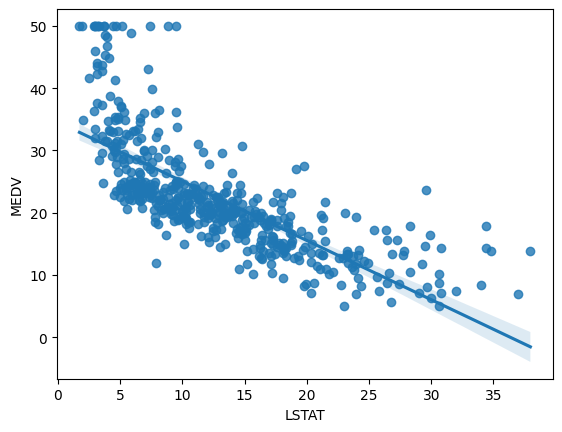

In [ ]:
#Hacemos los scatterplot con los atribtos y la variable respuesta
sns.regplot(x='LSTAT', y='MEDV', data=data) #LSTAT y MEDV

<Axes: xlabel='RM', ylabel='MEDV'>

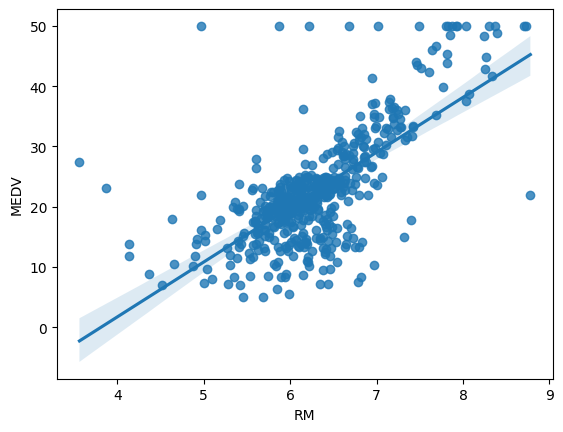

In [ ]:
sns.regplot(x='RM', y='MEDV', data=data) #RM y MEDV

<Axes: xlabel='B', ylabel='MEDV'>

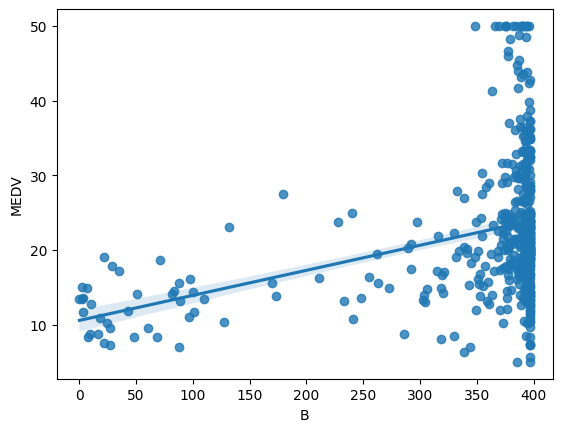

In [ ]:
#Ahora con los 2 más débiles
sns.regplot(x='B', y='MEDV', data=data) #B y MEDV

<Axes: xlabel='DIS', ylabel='MEDV'>

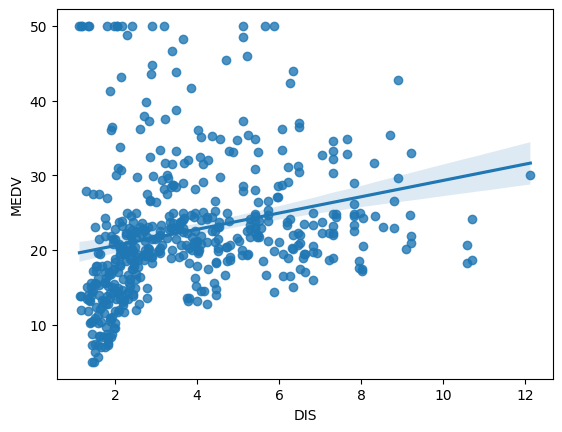

In [ ]:
sns.regplot(x='DIS', y='MEDV', data=data) #DIS y MEDV

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong>
<br> Observando los gráficos, comenta brevemente si logras visualizar las correlaciones altas o bajas que identificaste numéricamente.
</div>


Las correlaciones que se identificaron tras el sort nos demuestran gráficamente que la correlación (ya sea positiva o negativa) tiene que ver con qué tanto los datos parecen tener una relación lineal. En este sentido es claro que la correlación lineal de LSTAT y RM con MEDV es mayor que la correlación de B y DIS con MEDV al tener estos últimos datos más dispersos y sin una relación lineal fuerte. Ahora por lo que muestran los gráficos LSTAT parece tener una correlación negativa con MEDV mientras que RM tiene una correalción positiva con MEDV. LAs que no presentan tanto una correlación lineal parecen tener algo de tendencia pero no es clara.

---
## <font color='264CC7'> Reducción de la dimensionalidad </font>


En este ejercicio aplicaremos métodos de reducción de dimensionalidad al conjunto original de datos. El objetivo es reducir el número de atributos a un nuevo conjunto con menos dimensiones, pero que conserven la máxima información posible presente en los atributos originales.


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
<ul>
    <li>Aplica el método de reducción de dimensionalidad Principal Component Analysis (PCA) para reducir a 2 dimensiones el dataset original que contiene todos los atributos.</li>
    <li>Genera un gráfico con el resultado del PCA, mostrando los valores de las dos componentes principales en los ejes x e y, y utilizando una escala de colores para representar el valor de la respuesta MEDV. El objetivo es visualizar cómo varía MEDV en función de las componentes principales generadas.</li>
</ul>
    
NOTA: Asegúrate de no incluir la variable objetivo "MEDV" en la reducción de dimensionalidad. Queremos explicar la variable objetivo en función del resto de variables reducidas a dos dimensiones.

<hr>
Sugerencia: No necesitas programar el algoritmo de PCA desde cero, puedes usar la implementación disponible en la librería "scikit-learn".<br>
Sugerencia: Para el gráfico, utiliza el scatter plot de matplotlib con el parámetro "c" para asignar los colores de los puntos según los valores de la variable objetivo.
</div>


In [ ]:
# Estandarizar las características primero
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop(columns=["CHAS","MEDV"]))

In [ ]:
#Usamos sckit learn para hacer un ACP sin tomar en cuenta MEDV
pca = PCA(n_components=2)
data_pca = pca.fit_transform(X_scaled)

Text(0, 0.5, 'Componente ACP 2')

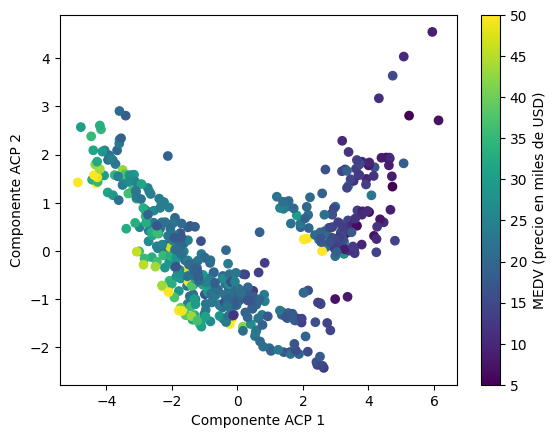

In [ ]:
#mostramos el resultado de MEDV en función de la primera y segunda componente y representamos por escala de colores el MEDV
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data['MEDV'], cmap='viridis')
plt.colorbar(label='MEDV (precio en miles de USD)')
plt.xlabel('Componente ACP 1')
plt.ylabel('Componente ACP 2')


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
<ul>
    <li>Aplica la reducción de dimensionalidad usando TSNE. Puedes encontrar más información sobre este algoritmo en el siguiente enlace: <a href="https://distill.pub/2016/misread-tsne">https://distill.pub/2016/misread-tsne/</a></li>
    <li>Al igual que antes, genera un gráfico con el resultado del TSNE, mostrando en los ejes x e y los valores de las 2 nuevas dimensiones, y utiliza una escala de colores para representar el valor de la respuesta MEDV.</li>
</ul>

<hr>
Sugerencia: No necesitas programar el algoritmo TSNE desde cero, puedes usar la implementación disponible en la librería "scikit-learn".<br>
Sugerencia: Además de especificar el número de componentes, experimenta con los parámetros "learning_rate" y "perplexity".<br>
Sugerencia: Para el gráfico, utiliza el scatter plot de matplotlib con el parámetro "c" para asignar los colores de los puntos según los valores de la variable objetivo.
</div>


In [ ]:
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=1)  # semilla
# se vio que perxplesity cambia la forma de agrupación de los datos y que se recomienda entre 5 y 50, y learning rate es la rapidez del descenso de gradiente. Probaremos en este caso con 200
data_tsne = tsne.fit_transform(data.drop('MEDV', axis=1))  # X: tu matriz de datos (features)

Text(0, 0.5, 'Componente TSNE 2')

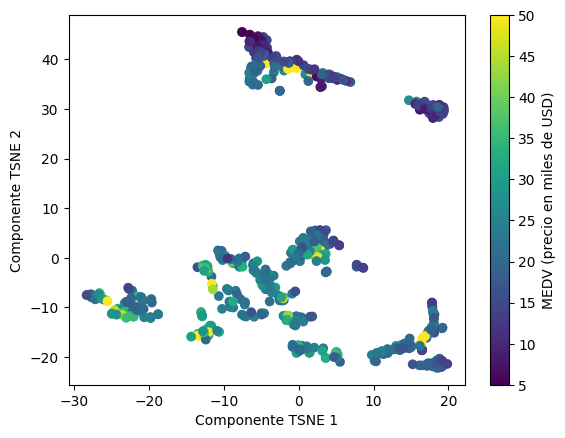

In [ ]:
#Ahora graficamos como hicimos antes
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=data['MEDV'])
plt.colorbar(label='MEDV (precio en miles de USD)')
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong>
<br> Observando los dos gráficos, ¿consideras que la reducción de dimensionalidad ha funcionado adecuadamente? ¿Crees que las 2 nuevas dimensiones logran explicar la variación de MEDV y permiten visualizar de manera diferenciada los precios altos y bajos? Si utilizáramos las 2 nuevas variables para predecir MEDV, ¿con cuál de los dos métodos de reducción de dimensionalidad (PCA o TSNE) obtendríamos mejores resultados?
    
¿Por qué crees que obtenemos resultados tan diferentes entre ambos métodos?
</div>


Si considero que funcionó adecuadamente la reducción en ambos casos porque los colores y su concentración denotan también que los grupos manejan bien los datos de precios altos y bajos de MEDV. En este sentido viendo que los colores oscuros (precios bajos) se juntan más con los colores claros (precios altos) siendo muy notorios al incluso separarse en ambos gráficos.

Ahora, dada justamente la tendencia de colores, parece que el ACP en este caso tiene mejor forma de discriminar los datos en grupos que el tsne porque se muestran menos errores (o datos que no deberían pertenecer a esos grupos de acuerdo a la tendencia) que en el tsne. Las razones de manera breve pueden ser por haber jugado justamente con los parametros perlplexity y learning rate más específicamente (ya que al alargar los saltos  de descenso de gradiente puede cometer más errores en ese sentido) pero definitivamente no lo hacen un mal método de reducción de dimensionalidad. (no se usaron tampoco los datos estandarizados en el tsne pq no se conoce si es una implicación teórica como la del ACP)

---
## <font color='264CC7'> Entrenamiento y test </font>

En este último ejercicio se trata de aplicar un método de aprendizaje supervisado, concretamente el Linear Regression y K-means, para predecir las variables MEDV y CHAS, resectivamente, y evaluar la precisión obtenida con los modelo. Para eso usaremos:
<ul>
    <li>El conjunto de datos original con todos los atributos</li>
    <li>El conjunto de datos reducido a sólo 2 atributos con PCA</li>
</ul>

Divide los datos en dos conjuntos: uno para entrenamiento y otro para prueba y visualiza la dimensión de cada conjunto. Usar `random_state` igual al últmo número de tu cédula.

### <font color='264CC7'> Regresión </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Usando el conjunto de datos original:
    
<ul>
    <li>Divide el dataset en train y test.</li>
    <li>Define un modelo Linear Regression.</li>
    <li>Aplica validación cruzada con el modelo definido y el dataset de train (con cv=5 es suficiente).</li>
    <li>Como métricas para cuantificar el error del modelo, utiliza R2 (coeficiente de determinación) y MAE (media del error absoluto) separadamente.</li>
    <li>Calcula la media y la desviación estándar del error obtenido en cada caso.</li>
</ul>
    
<hr>
Sugerencia: Para aplicar validación cruzada, utiliza 'cross_val_score' de sklearn y modifica su parámetro 'scoring' si es necesario.<br>
</div>


In [ ]:
# Dividir datos en entrenamiento y prueba (En regresion es para MEDV)
column_names = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'] #Excluimos CHAS por ser una variable categórica que no se analiza en ACP
X = data.loc[:, column_names]
y = data.loc[:, ['MEDV']]
#Revisamos
print(X.head())
print(y.head())
#Separamos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
#Definimos un Linear Regression
model1 = LinearRegression()
#Lo ajustamos
model1.fit(X_train, y_train)
#definimos validacion cruzada
scores_r2 = cross_val_score(model1, X_train, y_train, cv=5, scoring='r2') #Usamos R2 cambiando el scoring
scores_mae = cross_val_score(model1, X_train, y_train, cv=5, scoring='neg_mean_absolute_error') #Usamos MAE cambiando scoring
#Calculamos y mostramos la media y la desv estandar
print("\nMedia R2:", scores_r2.mean())
print("\n Desviacion estandar R2:", scores_r2.std())
print("\nMedia MAE:", abs(scores_mae.mean())) #Para interpretación real
print("\nDesviacion estandar MAE:", scores_mae.std())

      CRIM    ZN  INDUS    NOX     RM   AGE     DIS  RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31  0.538  6.575  65.2  4.0900    1  296.0     15.3   
1  0.02731   0.0   7.07  0.469  6.421  78.9  4.9671    2  242.0     17.8   
2  0.02729   0.0   7.07  0.469  7.185  61.1  4.9671    2  242.0     17.8   
3  0.03237   0.0   2.18  0.458  6.998  45.8  6.0622    3  222.0     18.7   
4  0.06905   0.0   2.18  0.458  7.147  54.2  6.0622    3  222.0     18.7   

        B  LSTAT  
0  396.90   4.98  
1  396.90   9.14  
2  392.83   4.03  
3  394.63   2.94  
4  396.90   5.33  
   MEDV
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2

Media R2: 0.7041803290641241

 Desviacion estandar R2: 0.03778136907153628

Media MAE: 3.329372292330946

Desviacion estandar MAE: 0.3287208076417264


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Repite el mismo procedimiento que en el ejercicio anterior, pero utilizando el dataset reducido a 2 dimensiones con PCA.
</div>


In [ ]:
#Ahora usamos las dos componentes del pca que creamos y los datos de MEDV que ya se separaron en y
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(data_pca, y, test_size=0.2, random_state=1)
#Otro modelo
model2 = LinearRegression()
#Lo ajustamos
model2.fit(X_train, y_train)
#Hacemos las validaciones cruzadas
scores_r2_pca = cross_val_score(model2, X_train_pca, y_train_pca, cv=5, scoring='r2')
scores_mae_pca = cross_val_score(model2, X_train_pca, y_train_pca, cv=5, scoring='neg_mean_absolute_error')
#Calculamos y mostramos la media y la desv estandar
print("\nMedia R2 (PCA):", scores_r2_pca.mean())
print("\n Desviacion estandar R2 (PCA):", scores_r2_pca.std())
print("\nMedia MAE (PCA):", abs(scores_mae_pca.mean()))
print("\nDesviacion estandar MAE (PCA):", scores_mae_pca.std())


Media R2 (PCA): 0.39715592805870126

 Desviacion estandar R2 (PCA): 0.08888205104833195

Media MAE (PCA): 4.8531594197007735

Desviacion estandar MAE (PCA): 0.5229639946123266


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>
¿Con qué datos ha funcionado mejor el modelo? ¿Tiene sentido el resultado? ¿Está alineado con los resultados observados en el ejercicio 3?
</div>


De acuerdo a los valores de media y desviación estandar tanto de los scores con $R^2$ y MAE tenemos que:
- El ACP cuenta con un $R^2$ menor al de los datos originales (0.397 frente a 0.70), esto dando a entender que los datos originales representan mejor los datos.
- Las sd de $R^2$ en este caso denotan poca variabilidad para los datos originales lo cual es mejor en este caso.
-Las medias de las métricas de RAE son más bajas en los datos originales (un 3.329 a  un 4.853 significa que en promedio las casas valen 3329 dólares según los datos orignales y 4853 dólares según ACP)
- De nuevo, la desviación estándar es menor en los datos originales siendo esto mejor que en ACP

A pesar de que ACP debería mejorar las métricas, decimos que en este caso no lo hizo (incluso cuando se realizó la estandarización común).

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Con el mejor modelo que hayas obtenido:
    
<ul>
  <li>Genera predicciones sobre el dataset de test.</li>
  <li>Calcula la precisión de las predicciones obtenidas usando R2 (coeficiente de determinación) y MAE (media del error absoluto).</li>
</ul>

<hr>
Sugerencia: Para calcular R2 y MAE, utiliza las funciones disponibles en el módulo "metrics" de sklearn.
</div>


In [ ]:
#hacemos el predict con el modelo 1 (Datos originales)
y_pred = model1.predict(X_test)
#calculamos R2 y MAE
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("R2:", r2)
print("MAE:", mae)

R2: 0.7553439858343953
MAE: 3.79948142202294


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>
¿Cuál de las dos métricas propuestas para evaluar los modelos (R2 o MAE) usarías para explicar la calidad del modelo a un ejecutivo de una inmobiliaria? ¿Y cuál usarías para explicarlo a un analista matemático de la misma compañía? ¿Por qué?  
</div>


Utilizaría un R2 para el ejecutivo de inmobiliaria ya que el R2 suele ser un score normalmente utilizado por muchos estadísticos que mucha gente tiene presente y, por tanto, a un ejecutivo se le haría familiar y seguro entender por seguro un modelo con un R2 bueno. En cambio, usaría un MAE para explicarle a un analista matemático porque en matemática también es importante saber la robustez de los scores y el error absoluto medio permite justamente hacer un análisis de la diferencia absoluta entre lo predicho y lo actual que muchas veces es más preciso por no considerar la varianza sino solo la diferencia de estos valores que se restan. Por tanto tendría en mi opinión más peso matemático en casos como por ejemplo varianzas altas o incluso en datos con outliers y por ello un analista matemático lo valoraría más.

No obstante, si considero que el R2 necesita mejor interpretabilidad si no se conoce sobre este score a diferencia del MAE, que en este caso un ejecutivo podría entender que el error de los precios es de más o menos un rango de 3 mil dólares a un valor de 0.7 positivo de R2 (algo que un matemático con conocimiento en estadística comprende perfectamente). Con este caso dependería entonces de la familiaridad del ejecutivo en relacion a los scores.

### <font color='264CC7'> Clasificación </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Usando el conjunto de datos original:
    
<ul>
    <li>Divide el dataset en train y test.</li>
    <li>Define un modelo K-means.</li>
    <li>Como métricas para cuantificar el error del modelo, utiliza la precisión, la sensibilidad y f1-score.</li>
</ul>



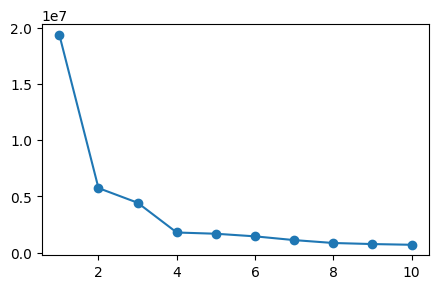

In [ ]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'] #No se incluye MEDV ya que al no haberse incluido en el PCA antes se consideraría no comparable este k-means con el del pca.
X = data.loc[:, column_names]
y = data.loc[:, ["CHAS"]] #Ahora la variable de clasificación es CHAS

# Para definir el número de clusters, definimos con el metodo del codo
inertia = []
for i in range(1, 11):
    modelo = KMeans(n_clusters=i, random_state=42)
    modelo.fit(X)
    inertia.append(modelo.inertia_)
plt.figure(figsize=(5, 3))
plt.plot(range(1, 11), inertia, marker='o')

In [ ]:
#El método del codo da la posibilidad de escoger entre 2 o 4 componentes, para poder ser comparable con precio alto y bajo escogeremos 2 (después se vió que incluso asi no dejaba escoger 4 se asume por la variable categórica usada)
modelo3 = KMeans(n_clusters=2, random_state=1)
modelo3.fit(X)
#Usamos la precisión, sensibilidad y f1-score
precision = precision_score(y, modelo3.labels_)
sensibilidad = recall_score(y, modelo3.labels_)
f1 = f1_score(y, modelo3.labels_)
print("Precisión:", precision)
print("Sensibilidad:", sensibilidad)
print("F1-score:", f1)

Precisión: 0.058394160583941604
Sensibilidad: 0.22857142857142856
F1-score: 0.09302325581395349


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Repite el mismo procedimiento que en el ejercicio anterior, pero utilizando el dataset reducido a 2 dimensiones con PCA.
</div>


In [ ]:
#Ahora con los datos del PCA
model4 = KMeans(n_clusters=2, random_state=1)
model4.fit(data_pca)
#Usamos la precisión, sensibilidad y f1-score
precision = precision_score(y, model4.labels_)
sensibilidad = recall_score(y, model4.labels_)
f1 = f1_score(y, model4.labels_)
print("Precisión (PCA):", precision)
print("Sensibilidad (PCA):", sensibilidad)
print("F1-score (PCA):", f1)

Precisión (PCA): 0.06990881458966565
Sensibilidad (PCA): 0.6571428571428571
F1-score (PCA): 0.12637362637362637


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>
¿Cuál de las dos métricas propuestas para evaluar los modelos (precisión, sensibilidad o f1-score) usarías para explicar la calidad del modelo a un ejecutivo de una inmobiliaria? ¿Y cuál usarías para explicarlo a un analista matemático de la misma compañía? ¿Por qué? ¿El modelo es mejor discriminando o acertando? ¿Cómo se interpreta esto último?


En el caso del ejecutivo prefeiría mostrarle una matriz de confusión en vez de las métricas para su entendimiento, pero si el caso es necesario mostrarle alguna métrica le mostraría la precisión o el recall ya que son valores que diríamos "sencillos" de calcular y por ende de entender. A un analista matemático le presentaría las trés métricas y especialmente el score f1 que permite ver el equilibrio entre la precisión y la sensibilidad. Esto dado que al entender el lado analítico de la empresa le conviene conocer las tres métricas en función del objetivo del modelo. En este caso, el modelo es un buen discretizador (al menos notoriamente en ACP) porque su valor de sensibilidad es alto comparado al modelo de datos originales y a los scores de ambos modelos de precisión. No obstante en precisión ambos modelos tienen valores muy bajos y también por ello no se podría decir que son modelos para acertar. En conclusión los modelos obtenidos en este caso son para discriminar, y de acuerdo a los scores el modelo que mejor discrimina es el que se realizó con los datos del ACP.

